# Write linear regression model

In [20]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


#import data

data=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')
data


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


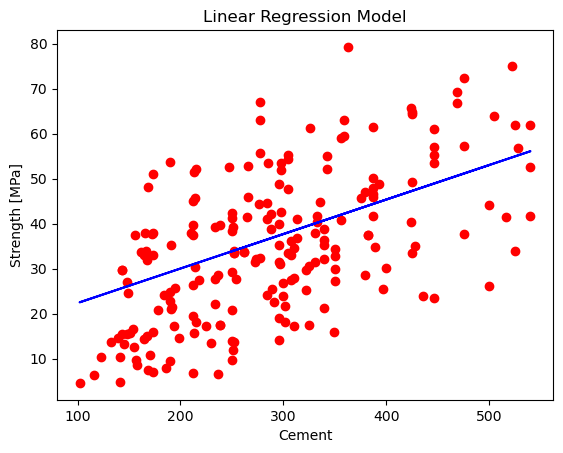

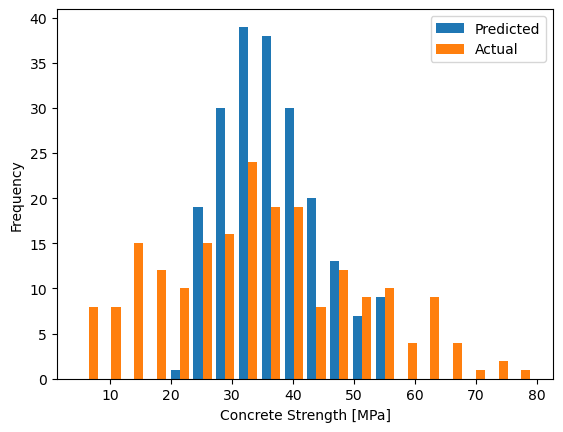

In [25]:

# assign features and target 
X = data.iloc[:, 0] 
y = data.iloc[:, 8] 

# split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear regression model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train.values.reshape(-1,1), y_train)

# make predictions 
y_pred = regressor.predict(X_test.values.reshape(-1,1))

# visualize the results 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_test, y_pred, color='blue') 
plt.title('Linear Regression Model') 
plt.xlabel('Cement') 
plt.ylabel('Strength [MPa]') 
plt.show()

# plot predicted vs actual
plt.hist([y_pred, y_test], bins=20, label=['Predicted', 'Actual'])
plt.xlabel('Concrete Strength [MPa]')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [26]:
# calculate RMSE
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

13.360937319636081

# Adding Features

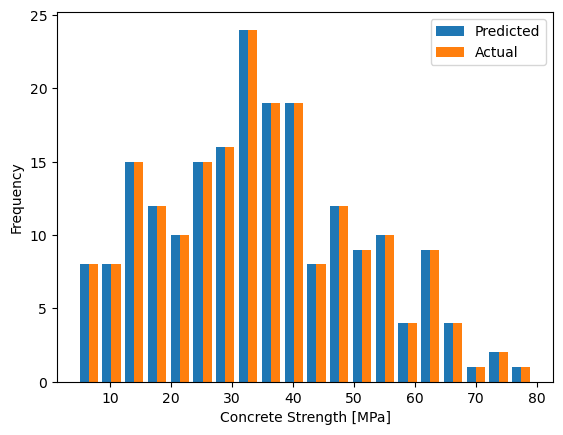

In [41]:
# assign features and target 
X = data.iloc[:, 0] 
y = data.iloc[:, 8] 
features = data.iloc[:, 7:] 

# split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_features, X_test_features, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=0)

# fit the linear regression model with added features 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train_features, y_train)

# make predictions 
y_pred = regressor.predict(X_test_features)

# calculate RMSE
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

# plot predicted vs actual
plt.hist([y_pred, y_test], bins=20, label=['Predicted', 'Actual'])
plt.xlabel('Concrete Strength [MPa]')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [42]:
rmse

1.4433313885877602e-15

# Lasso

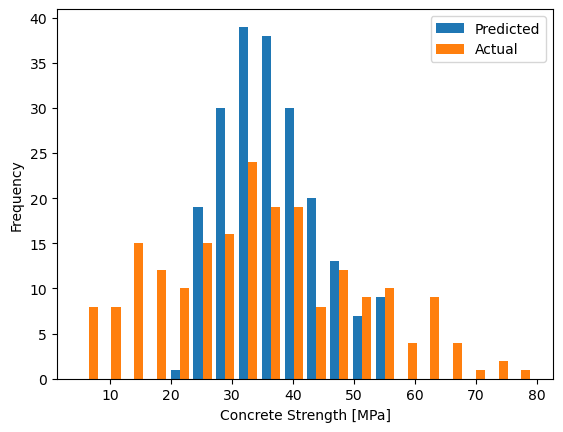

In [31]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# import data 
data=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')

# assign features and target 
X = data.iloc[:, 0] 
y = data.iloc[:, 8] 
features = data.iloc[:, 7:] 

# split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_features, X_test_features, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=0)

# fit the LASSO model with added features 
from sklearn.linear_model import Lasso 
regressor = Lasso(alpha=0.1) 
regressor.fit(X_train_features, y_train)

# calculate RMSE
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

# plot predicted vs actual
plt.hist([y_pred, y_test], bins=20, label=['Predicted', 'Actual'])
plt.xlabel('Concrete Strength [MPa]')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [32]:
rmse

13.3610405697999

### Lasso attempt 2

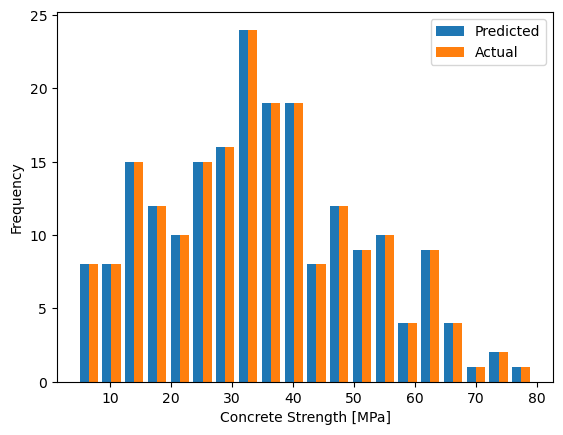

In [34]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


# assign features and target 
X = data.iloc[:, 0] 
y = data.iloc[:, 8] 
features = data.iloc[:, 7:] 

# split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_features, X_test_features, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=0)

# fit the LASSO model 
from sklearn.linear_model import Lasso 
regressor = Lasso(alpha=0.1) 
regressor.fit(X_train_features, y_train)

# make predictions 
y_pred = regressor.predict(X_test_features)

# calculate RMSE
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

# plot predicted vs actual
plt.hist([y_pred, y_test], bins=20, label=['Predicted', 'Actual'])
plt.xlabel('Concrete Strength [MPa]')
plt.ylabel('Frequency')
plt.legend()
plt.show()

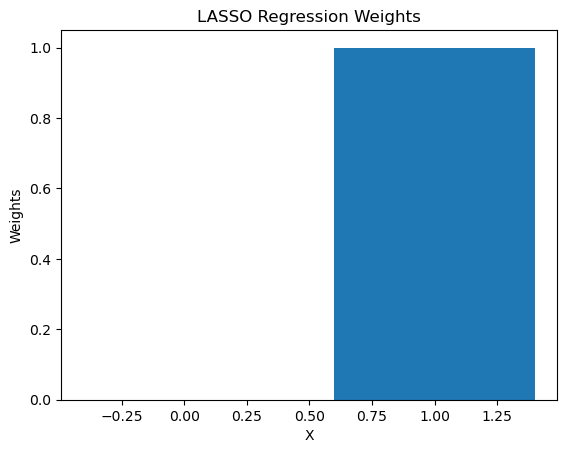

In [35]:
# visualize the weights 
plt.bar(range(len(regressor.coef_)), regressor.coef_) 
plt.title('LASSO Regression Weights') 
plt.xlabel('X') 
plt.ylabel('Weights') 
plt.show()


In [36]:
rmse

0.005765832225381834

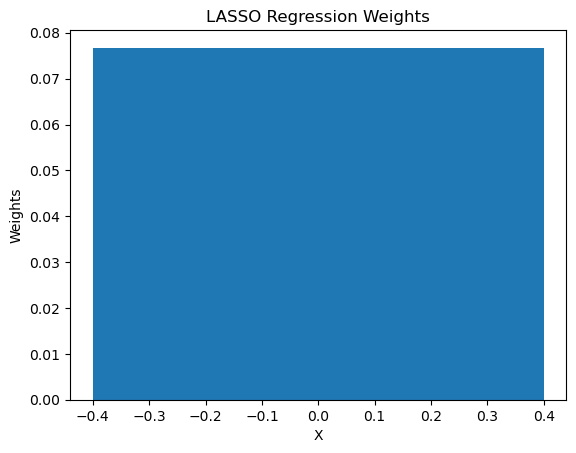

In [43]:
#compare weights to regular regression

# assign features and target 
X = data.iloc[:, 0] 
y = data.iloc[:, 8] 

# split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear regression model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train.values.reshape(-1,1), y_train)

# make predictions 
y_pred = regressor.predict(X_test.values.reshape(-1,1))

# visualize the weights 
plt.bar(range(len(regressor.coef_)), regressor.coef_) 
plt.title('LASSO Regression Weights') 
plt.xlabel('X') 
plt.ylabel('Weights') 
plt.show()

# Logistic Regression
so many errors keep coming up and it's mostly from things not being defined and I'm having trouble finding it all

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# load the dataset
df=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')

# split the data into training and testing sets
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df['goodconcrete']=(df.csMPa>45.0).astype(int)
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,goodconcrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0


In [25]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values
y_val = df_val.csMPa.values
y_test = df_test.csMPa.values

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

base = ['superplasticizer', 'flyash', 'age']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X
X_train = prepare_X(df_train)

# create a logistic regression model
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train) #something wrong with this line

LogisticRegression(random_state=1, solver='liblinear')

In [34]:
# make predictions on the testing data
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[categorical + numerical].to_dict(orient='records')
categorical = ['flyash']
numerical=['cement', 'slag', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)



In [35]:
model.predict_proba(X_val)


array([[0.00000000e+00, 1.00000000e+00],
       [4.23883151e-13, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [5.77315973e-15, 1.00000000e+00],
       [4.88498131e-14, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [7.32747196e-14, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [5.74873482e-13, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [3.26405569e-14, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
good = y_pred > 0.5


In [45]:
y_val = np.average(good)


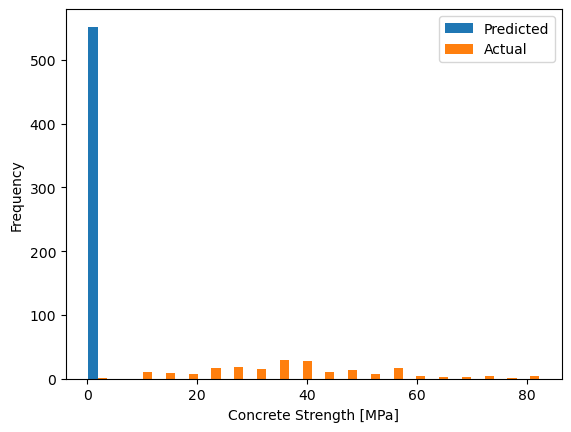

In [46]:
# visualize the results 
plt.hist([y_pred, y_test], bins=20, label=['Predicted', 'Actual'])
plt.xlabel('Concrete Strength [MPa]')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#this did not work

In [18]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,goodconcrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,0


# Kernel Ridge Regression

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
import numpy as np

df=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},)

X_train = prepare_X(df_train)
kr.fit(X_train, y_train)
GridSearchCV(estimator=KernelRidge(gamma=0.1, kernel='rbf'),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

NameError: name 'idx' is not defined

In [13]:
df.goodconcrete

0       1
1       1
2       0
3       0
4       0
       ..
1025    0
1026    0
1027    0
1028    0
1029    0
Name: goodconcrete, Length: 1030, dtype: int32

In [23]:
df.csMPA

AttributeError: 'DataFrame' object has no attribute 'csMPA'